In [1]:
import sklearn

In [2]:
sklearn.__version__

'0.23.1'

# Post Pruning technique - Cost complexity Pruning(ccp)

Will check trees by using new sklearn.tree which can display DT

DT ionvolves parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting
Cost complexity pruning provides another option to control the size of a tree. this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. 

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier


In [11]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)#By default will take, max_depth till end
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8811188811188811

####  Max_depth taken by classifier is 8

[Text(468.32142857142856, 513.4, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(298.9285714285714, 453.0, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(199.28571428571428, 392.6, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(119.57142857142856, 332.2, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(79.71428571428571, 271.8, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(39.857142857142854, 211.39999999999998, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(119.57142857142856, 211.39999999999998, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(79.71428571428571, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(159.42857142857142, 151.0, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(119.57142857142856, 90.59999999999997, 'X[8] <= 0.159\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(79.71428571428571,

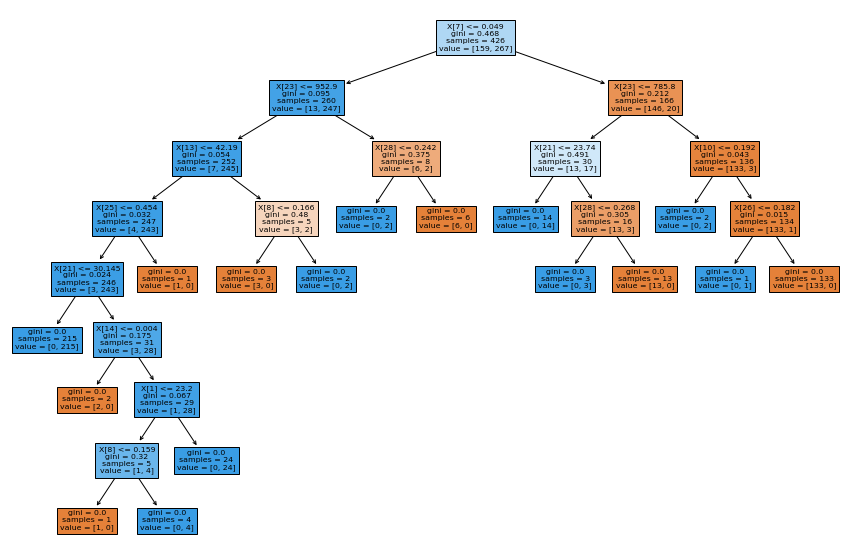

In [6]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

#### ccp calculated

In [13]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [14]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [15]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


###### When ccp_alpha is set to zero and keeping the other default parameters of :class:DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better

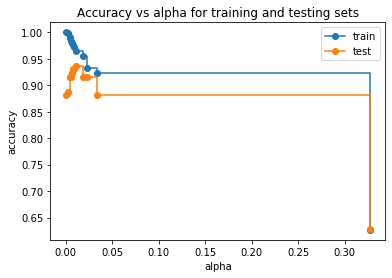

In [16]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [17]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [18]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9370629370629371

### Depth is reduced

[Text(418.5, 475.65000000000003, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(209.25, 339.75, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(104.625, 203.85000000000002, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(313.875, 203.85000000000002, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(627.75, 339.75, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(523.125, 203.85000000000002, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(418.5, 67.94999999999999, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(627.75, 67.94999999999999, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(732.375, 203.85000000000002, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

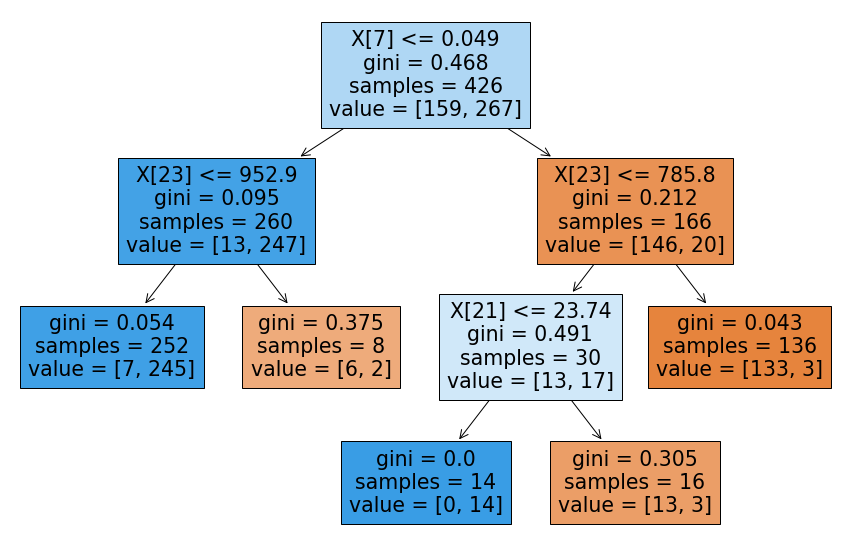

In [19]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)